# 🧠 Task 2: CNN on MNIST using TensorFlow

In this task, we implement a Convolutional Neural Network (CNN) using TensorFlow to classify handwritten digits from the MNIST dataset. 

### Objectives:
- Preprocess the dataset
- Build and train a CNN
- Evaluate performance (aim >95% accuracy)
- Visualize predictions


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to (28, 28, 1) to match CNN input format
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


### 🧩 CNN Architecture

The CNN consists of:
- 2 convolutional layers with ReLU activation
- 2 max pooling layers
- 1 dense hidden layer with ReLU
- Dropout layer to reduce overfitting
- Output layer with softmax activation


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Dropout to reduce overfitting
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for digits
])


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/10
844/844 - 9s - 10ms/step - accuracy: 0.9279 - loss: 0.2372 - val_accuracy: 0.9840 - val_loss: 0.0540
Epoch 2/10
844/844 - 7s - 9ms/step - accuracy: 0.9755 - loss: 0.0804 - val_accuracy: 0.9900 - val_loss: 0.0356
Epoch 3/10
844/844 - 8s - 9ms/step - accuracy: 0.9826 - loss: 0.0580 - val_accuracy: 0.9890 - val_loss: 0.0382
Epoch 4/10
844/844 - 7s - 9ms/step - accuracy: 0.9857 - loss: 0.0473 - val_accuracy: 0.9910 - val_loss: 0.0331
Epoch 5/10
844/844 - 7s - 8ms/step - accuracy: 0.9883 - loss: 0.0386 - val_accuracy: 0.9892 - val_loss: 0.0362
Epoch 6/10
844/844 - 7s - 9ms/step - accuracy: 0.9893 - loss: 0.0343 - val_accuracy: 0.9908 - val_loss: 0.0321
Epoch 7/10
844/844 - 11s - 13ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9912 - val_loss: 0.0350
Epoch 8/10
844/844 - 22s - 26ms/step - accuracy: 0.9922 - loss: 0.0257 - val_accuracy: 0.9900 - val_loss: 0.0368
Epoch 9/10
844/844 - 21s - 24ms/step - accuracy: 0.9929 - loss: 0.0217 - val_accuracy: 0.9918 - val_loss: 0

In [5]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {accuracy:.2%}")


✅ Test Accuracy: 99.24%


### 🔍 Visualize 5 Sample Predictions

We now plot 5 random test images with their true and predicted labels.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


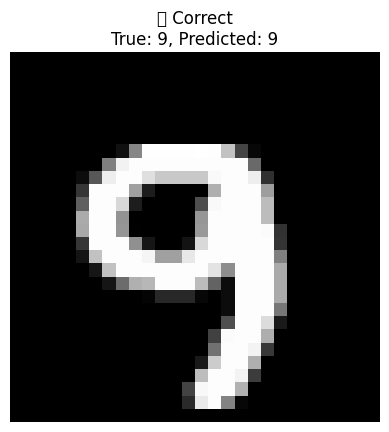

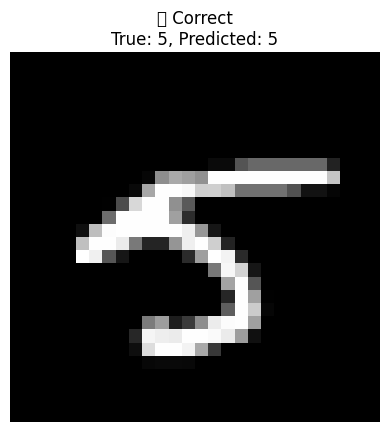

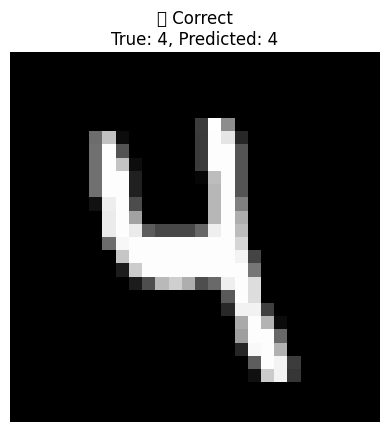

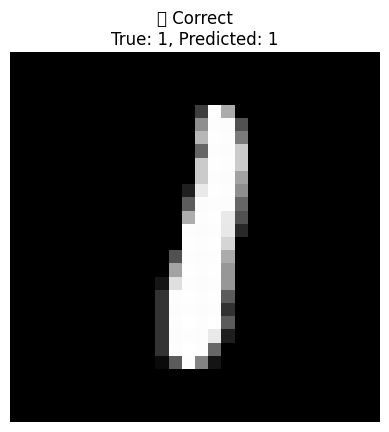

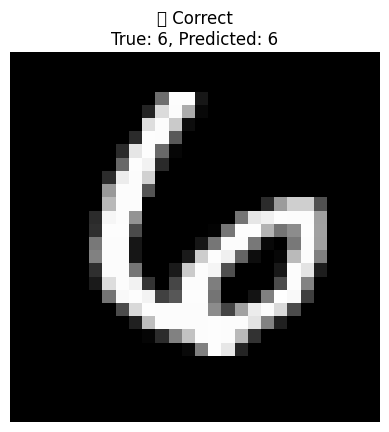

In [6]:
# Predict class probabilities
preds = model.predict(x_test)

# Visualize 5 random predictions
for i in range(5):
    idx = np.random.randint(0, len(x_test))
    image = x_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    pred_label = np.argmax(preds[idx])
    correct = "✅ Correct" if pred_label == true_label else "❌ Wrong"

    plt.imshow(image, cmap='gray')
    plt.title(f"{correct}\nTrue: {true_label}, Predicted: {pred_label}")
    plt.axis('off')
    plt.show()
